In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn-white')

dataset kaggle datasets download -d kumarajarshi/life-expectancy-who <br>
Note: Dataset has lot of problems, for example france as misclassified as developing country see discussion

In [2]:
data = pd.read_csv('data/Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


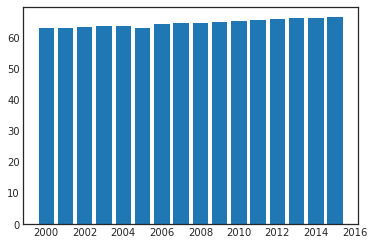

In [3]:
# select country == Pakistan
data_pk = data[data['Country'] == 'Pakistan']
plt.bar(data_pk['Year'], data_pk['Life expectancy '])
plt.show()


<BarContainer object of 16 artists>

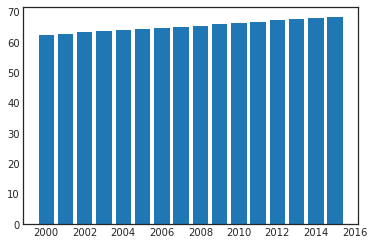

In [ ]:
# select country == India
data_ind = data[data['Country'] == 'India']
plt.bar(data_ind['Year'], data_ind['Life expectancy '])


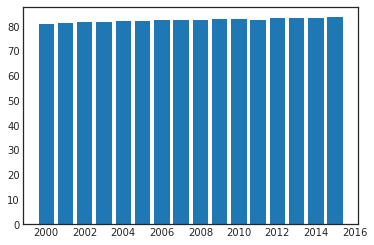

In [11]:
# select country == Japan
data_jp = data[data['Country'] == 'Japan']
plt.bar(data_jp['Year'], data_jp['Life expectancy '])
plt.show()

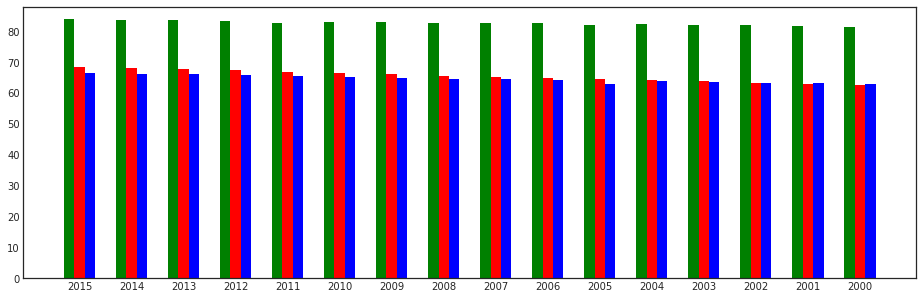

In [19]:
# show plt of three countries
labels = data_ind['Year']
width = 0.2
ind = np.arange(len(labels))
plt.figure(figsize=(len(labels), 5))

plt.bar(ind, data_jp['Life expectancy '], width, color='g')
plt.bar(ind+width, data_ind['Life expectancy '], width, color='r')
plt.bar(ind + width * 2, data_pk['Life expectancy '], width, color='b')
plt.xticks(ind + width, labels)
plt.show()



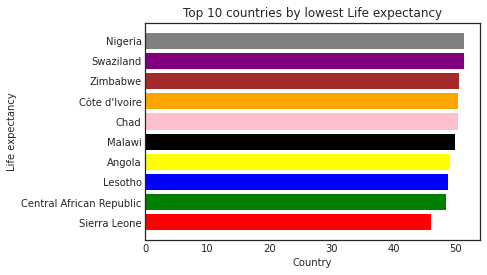

In [21]:
# top 10 countries by lowest Life expectancy
colors = ['red', 'green', 'blue', 'yellow', 'black', 'pink', 'orange', 'brown', 'purple', 'gray']
tmp = data.groupby('Country')['Life expectancy '].mean().sort_values(ascending=True).head(10)
plt.barh(tmp.index, tmp, color=colors)
plt.xlabel('Country')
plt.ylabel('Life expectancy')
plt.title('Top 10 countries by lowest Life expectancy')
plt.show()

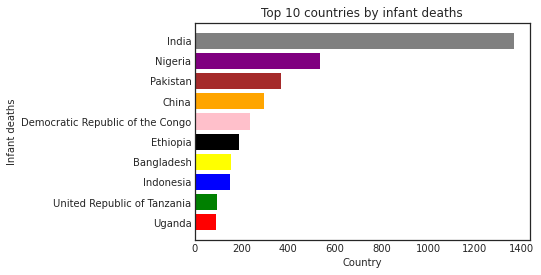

In [28]:
# top 10 countries by infant deaths
tmp = data.groupby('Country')['infant deaths'].mean().sort_values(ascending=False)
tmp = tmp[tmp > 0][:10]
tmp = tmp[::-1]
plt.barh(tmp.index, tmp, color=colors)
plt.xlabel('Country')
plt.ylabel('Infant deaths')
plt.title('Top 10 countries by infant deaths')
plt.show()

In [ ]:
# nan_cols = data.columns[data.isnull().any()]
# # fill na with interpolation
# for country in data['Country'].unique():
#     data.loc[data['Country']==country, nan_cols] = data.loc[data['Country']==country, nan_cols].interpolate(method='linear')
# data.dropna(inplace=True)
# data.isnull().sum()

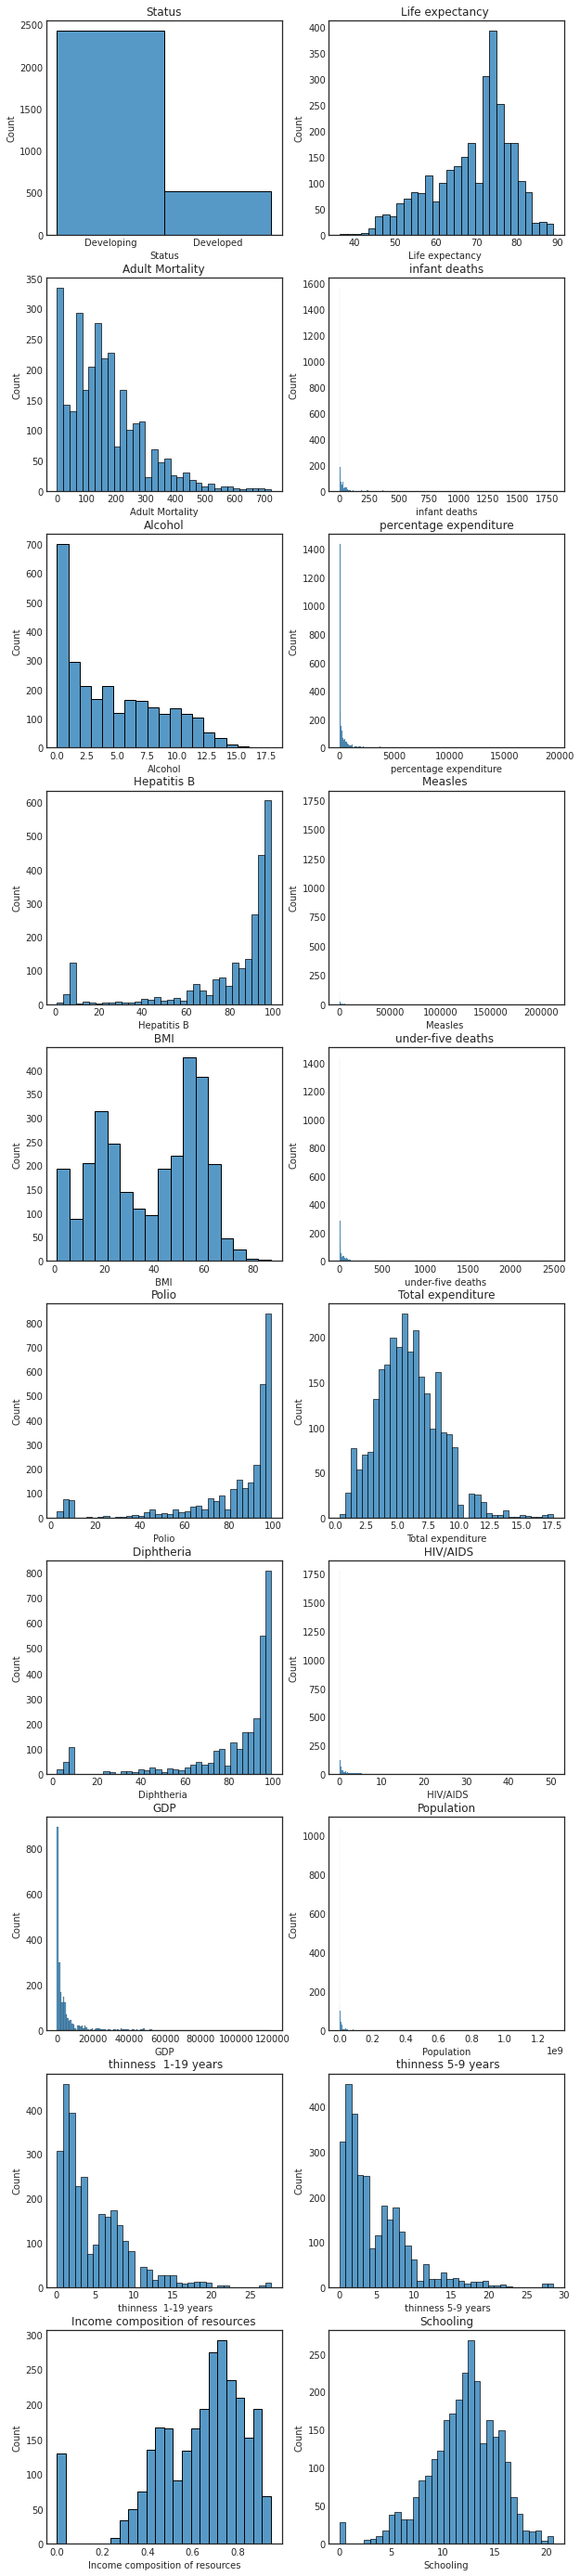

In [15]:
# histogram of all columns
cols = [col for col in data.columns if col not in ['Country', 'Year']]
plt.figure(figsize=(10,50))
for i, col in enumerate(cols):
    plt.subplot(len(cols)//2, 2, i+1)
    sns.histplot(data[col])
    plt.title(col)
plt.show()


Text(0.5, 1.0, 'Life expectancy w.r.t Status')

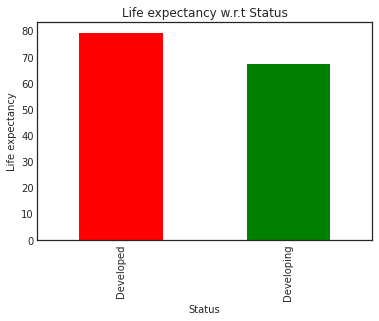

In [30]:
# Life_Expectancy w.r.t Status using bar plot.
data.groupby('Status')['Life expectancy '].mean().plot(kind='bar', color=['red', 'green'])
plt.xlabel('Status')
plt.ylabel('Life expectancy')
plt.title('Life expectancy w.r.t Status')

/home/ubuntu/miniconda3/envs/stat/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


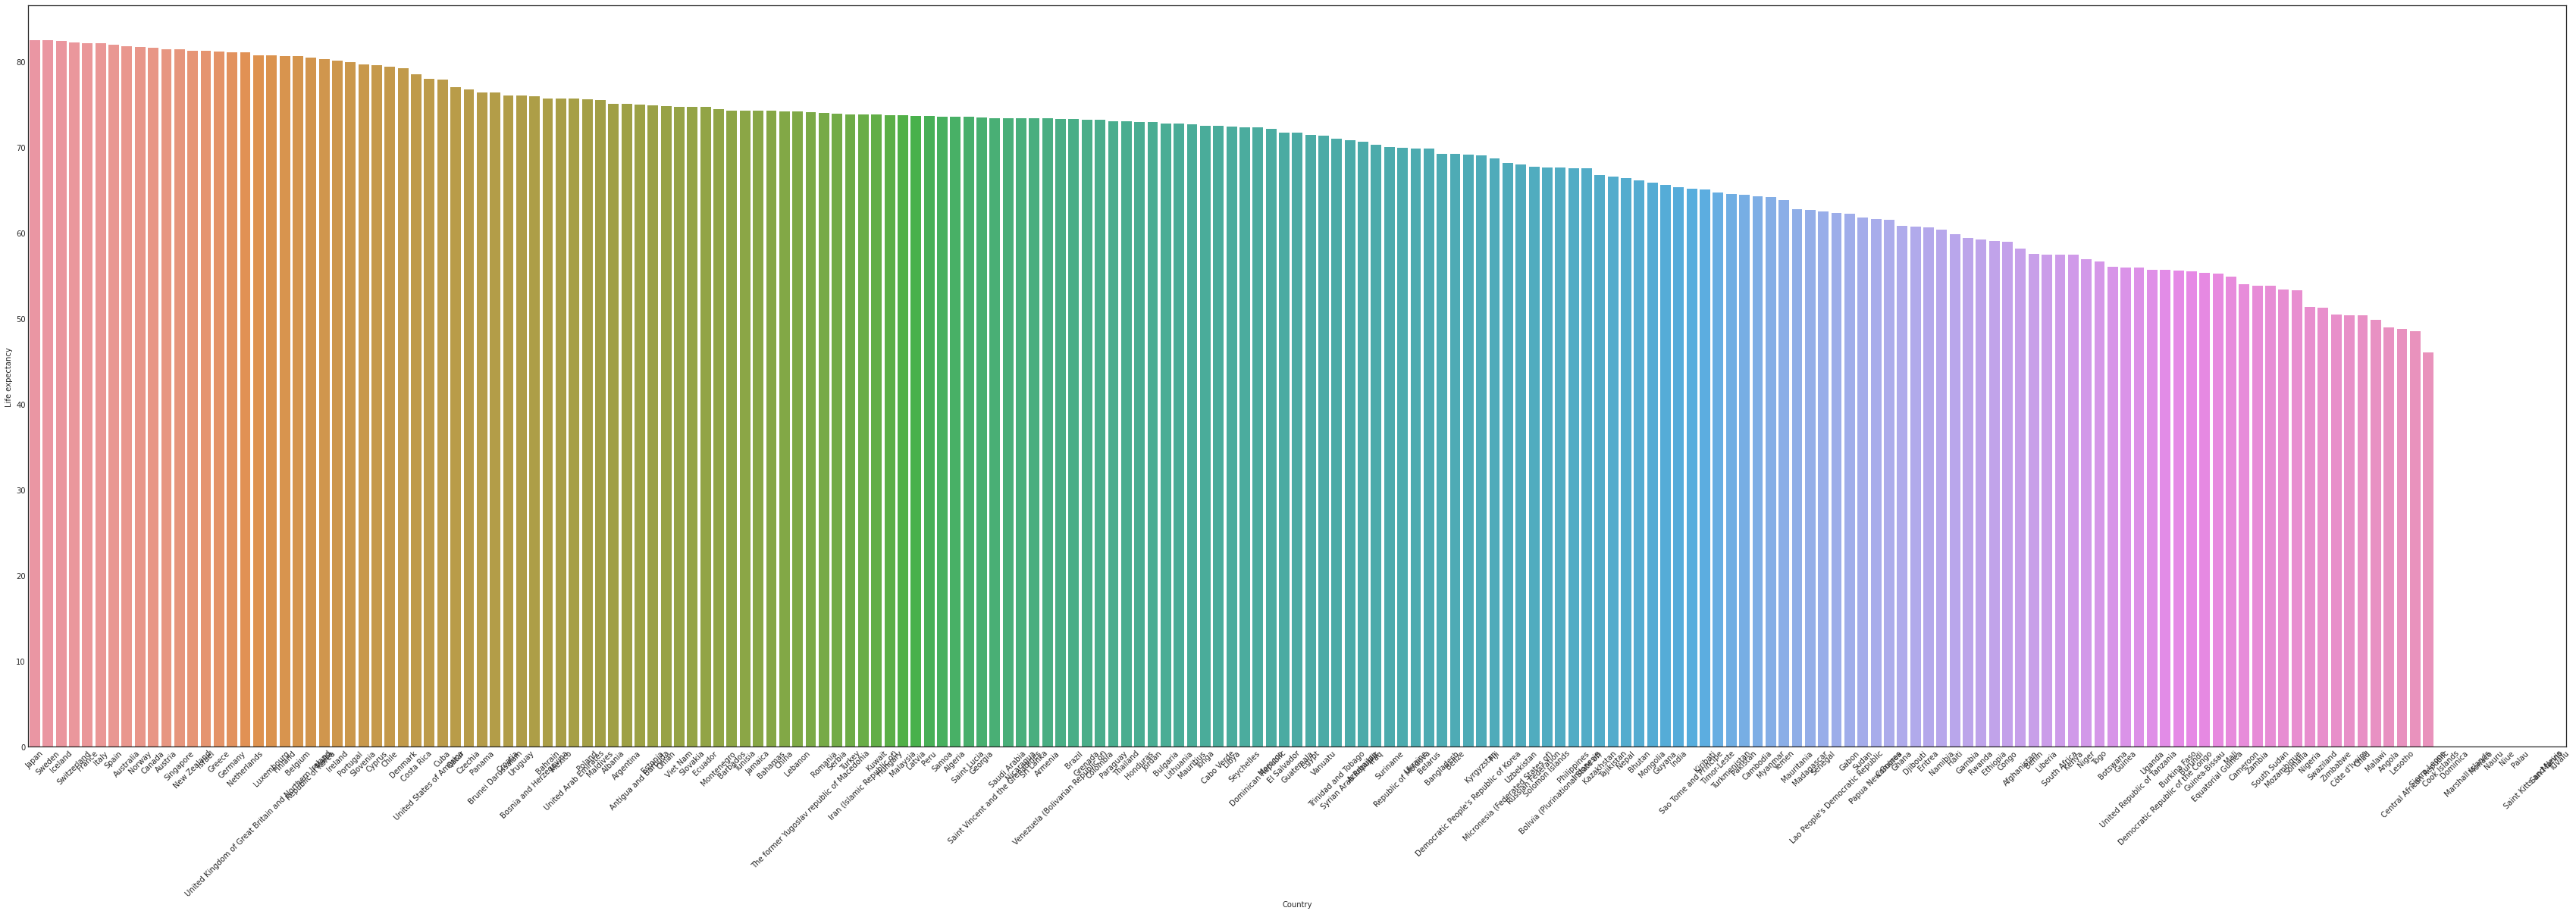

In [4]:
# Life_Expectancy w.r.t Country using bar plot.
tmp = data.groupby('Country')['Life expectancy '].mean().sort_values(ascending=False)
# set figsize
plt.figure(figsize=(60,18))

barplot = sns.barplot(tmp.index, tmp)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45)
fig = barplot.get_figure()
fig.savefig('Life_Expectancy w.r.t Country.png')
plt.show()


/home/ubuntu/miniconda3/envs/stat/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


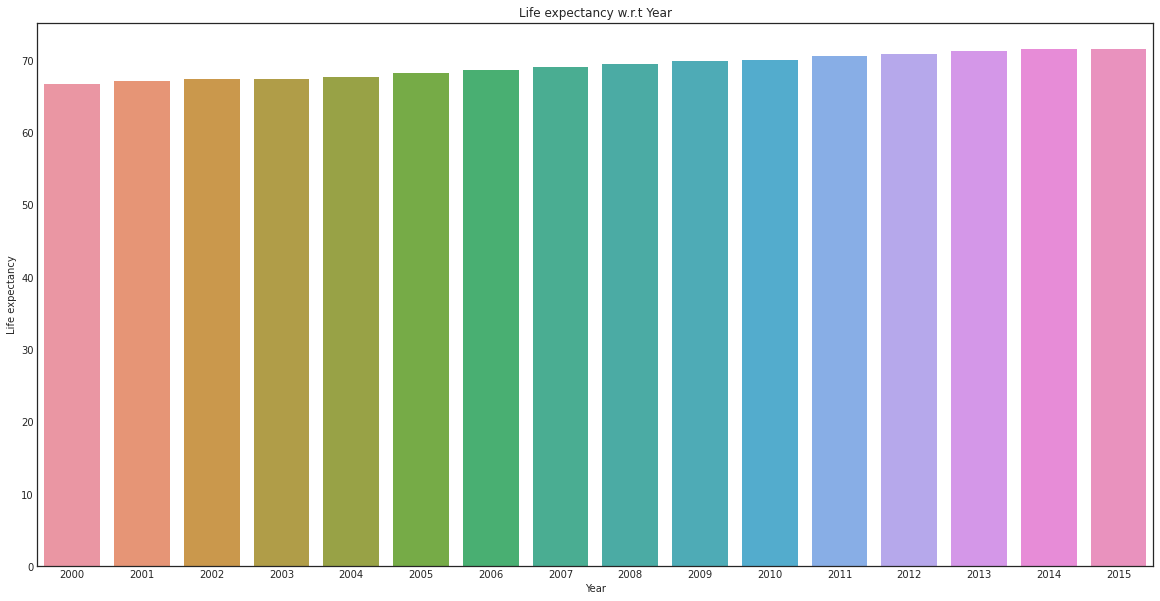

In [5]:
# Life_Expectancy w.r.t Year using bar plot.
tmp = data.groupby('Year')['Life expectancy '].mean().sort_values(ascending=False)
# set figsize
plt.figure(figsize=(20,10))
sns.barplot(tmp.index, tmp)
plt.xlabel('Year')
plt.ylabel('Life expectancy')
plt.title('Life expectancy w.r.t Year')
plt.show()


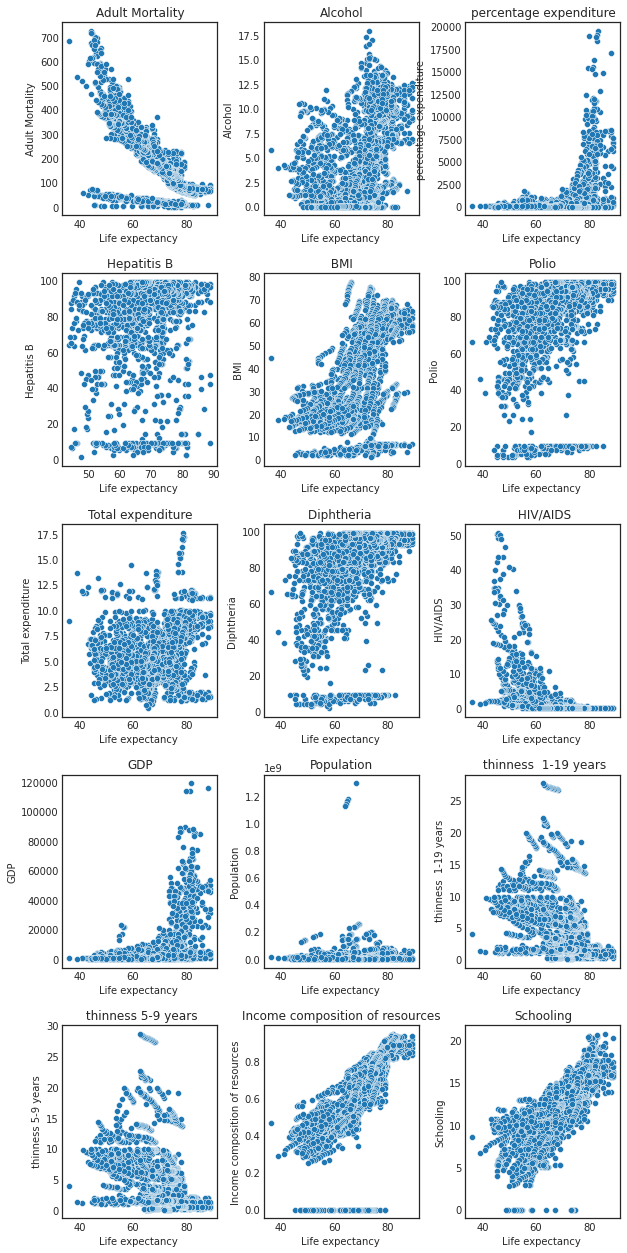

In [24]:
numerial_cols = [col for col in data.columns if col not in ['Country', 'Year', 'Status','Life expectancy '] and data[col].dtype in ['float64']]
plt.figure(figsize=(10,22))
# number of plots in rows and col as 3 plot per row
r = 3
c = len(numerial_cols)//3

for i ,col in enumerate(numerial_cols):
    plt.subplot(c, r, i+1)
    sns.scatterplot(x=data['Life expectancy '],y= data[col])
    plt.title(col)
plt.subplots_adjust(hspace=.3, wspace=.3)

        

/tmp/ipykernel_7402/437213422.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

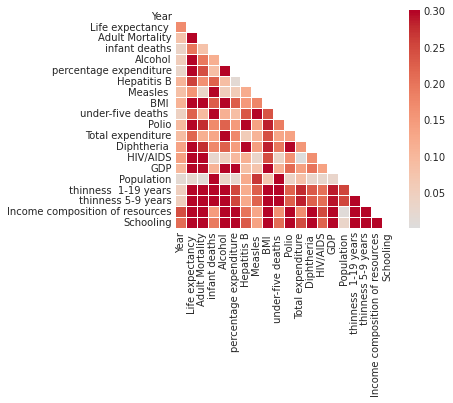

In [7]:
# correlation heatmap
corr = data.corr().abs()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=.3, center=0, square=True, linewidths=.5,cmap='coolwarm')